<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 155.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 168.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 146.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 150.4 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
#standardizing the df before handling missing values 
#in order to be able to better handle missing values in critical columns such as JobSat. 


In [4]:
#creating a copy of jobsat column in order to keep the original missing values as they might be meaningful 
df['JobSat_labeled'] = df['JobSat'].copy()  # df['JobSat'] stays as a numeric column with nan values
df['JobSat_labeled'] = df['JobSat_labeled'].fillna('Unknown') #df['JobSat_labeled'] has both numeric and non-numeric values, meaning I can't preform computations on this column.

In [5]:
#sorting the countries column in order to check if there are irregularities and standardizing the column after.
sorted_countries = sorted(df['Country'].dropna().unique())
sorted_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo, Republic of the...',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti'

In [6]:
#Replacing all country entries that need standardizing using a dictionary where the keys are the current and the values are the updated names
replacements = {
    "United States of America": "USA",
    "Republic of Korea": "South Korea",
    "South Korea": "South Korea",
    "Democratic People's Republic of Korea": "North Korea",
    "North Korea": "North Korea",
    "Russian Federation": "Russia",
    "United Kingdom of Great Britain and Northern Ireland": "UK",
    "Iran, Islamic Republic of...": "Iran",
    "Venezuela, Bolivarian Republic of...": "Venezuela",
    "Micronesia, Federated States of...": "Micronesia",
    "Lao People's Democratic Republic": "Laos",
    "Libyan Arab Jamahiriya": "Libya",
    "Swaziland": "Eswatini",
    "Czech Republic": "Czechia",
    "Republic of North Macedonia": "North Macedonia",
    "Hong Kong (S.A.R.)": "Hong Kong",
    "Nomadic": None   # or drop these rows entirely
}

df['Country'] = df['Country'].replace(replacements)

In [7]:
#Viewing the education level titles before deciding on the shortened standardized titles.  
sorted_Ed_Level = sorted(df['EdLevel'].dropna().unique())
sorted_Ed_Level

#Creating a dictionary of all standardized replacements 
ed_standard = {'Associate degree (A.A., A.S., etc.)':'Associate degree',
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':'Bachelor’s degree',
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':'Master’s degree',
 'Primary/elementary school':'Primary school',
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)':'Professional degree',
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'High school',
 'Some college/university study without earning a degree': 'Formal studies without earning a degree',
 'Something else':'Something else'
}
#replacing all education level titles. 
df['EdLevel'] = df['EdLevel'].replace(ed_standard)

In [8]:
#checking that my code worked as expected so far
check_df = df[['EdLevel', 'Country']]
check_df.head()

,EdLevel,Country
0,Primary school,USA
1,Bachelor’s degree,UK
2,Master’s degree,UK
3,Formal studies without earning a degree,Canada
4,High school,Norway


In [9]:
#viewing and sorting all the different employment titles in my df, as there are to many, sorting also helps in deciding how to standardize the column
sorted_emp = sorted(df['Employment'].dropna().unique())
sorted_emp

['Employed, full-time',
 'Employed, full-time;Employed, part-time',
 'Employed, full-time;Independent contractor, freelancer, or self-employed',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, p

In [10]:
import numpy as np

# simplified categories
simple_categories = [
    "Employed full time",
    "Employed part time",
    "Student full time",
    "Student part time",
    "Independent contractor",
    "I prefer not to say",
    "Not employed",
    "Retired"
]
#creating a function to standardize the Employment column

def simplify_employment(value):
    if pd.isna(value): #If missing value, return np.nan
        return np.nan
    
    # Convert to lower case to simplify matching
    v = value.lower()
    
    # I prefer not to say
    if "i prefer not to say" in v:
        return "I prefer not to say"
    
    # Retired
    elif "retired" in v:
        return "Retired"
    
    # Student full/part time
    elif "student, full-time" in v:
        return "Student full time"
    elif "student, part-time" in v:
        return "Student part time"
    
    # Employment full/part time
    elif "employed, full-time" in v:
        return "Employed full time"
    elif "employed, part-time" in v:
        return "Employed part time"
    
    # using the 'or' because there are several situations where I want to convert to Independent contractor
    elif "independent contractor" in v or "freelancer" in v or "self-employed" in v:
        return "Independent contractor"
    
    # Not employed
    elif "not employed" in v:
        return "Not employed"
    
    # Catch-all (optional in case I want to make sure my code doesn't miss any different entries)
    else:
        return "Other"

In [11]:
# Applying the simplify_employment function on the 'Employment' column, and assigning it to a new column
df['Employment_simplified'] = df['Employment'].apply(simplify_employment)
df['Employment_simplified'].value_counts()  #counting all the values in the new column, to verify my function works


Employment_simplified
Employed full time        43075
Student full time          8604
Independent contractor     5292
Not employed               3014
Student part time          2503
Employed part time         1722
Retired                     681
I prefer not to say         546
Name: count, dtype: int64

In [12]:
#one-hot encoding in pandas is performed using the pd.get_dummies method 
# I assigned the result to a df that I can later concat with my main df
dummy_df = pd.get_dummies(df['Employment_simplified']) #applying on my simplified emp column
dummy_df.head()

,Employed full time,Employed part time,I prefer not to say,Independent contractor,Not employed,Retired,Student full time,Student part time
0,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False


In [13]:
# Concating both dfs into the main df 
df = pd.concat([df, dummy_df], axis = 1)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,JobSat_labeled,Employment_simplified,Employed full time,Employed part time,I prefer not to say,Independent contractor,Not employed,Retired,Student full time,Student part time
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Employed full time,True,False,False,False,False,False,False,False
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Bachelor’s degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,UK,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,Na

In [14]:
#grouping my df by the emp simplified column, and viewing the distribution of each remote work per emp group
grouped_df = df.groupby('Employment_simplified')['RemoteWork'].value_counts(normalize=True)
grouped_df

Employment_simplified   RemoteWork                          
Employed full time      Hybrid (some remote, some in-person)    0.436657
                        Remote                                  0.354699
                        In-person                               0.208644
Employed part time      Hybrid (some remote, some in-person)    0.453170
                        Remote                                  0.327516
                        In-person                               0.219314
Independent contractor  Remote                                  0.671150
                        Hybrid (some remote, some in-person)    0.264633
                        In-person                               0.064217
Retired                 Remote                                  0.504132
                        Hybrid (some remote, some in-person)    0.322314
                        In-person                               0.173554
Student full time       Hybrid (some remote, some in-person)   

In [15]:
#Filling missing data in the RemoteWork column by the most freq value for each emp_type, making my data more accurate. 
#by looping trough each of the emp types and finding the most freq value for each emp type.
for emp_type in df['Employment_simplified'].unique():
    # finding the most common RemoteWork value for each employment type
    most_common = df.loc[df['Employment_simplified'] == emp_type, 'RemoteWork'].mode() #Assigning the most common value to a variable
    
    if not most_common.empty: #checking that the most_common variable is NOT empty to prevent code errors.
        # filling missing RemoteWork values for this group with its most common value
        df.loc[(df['Employment_simplified'] == emp_type) & (df['RemoteWork'].isnull()), 'RemoteWork'] = most_common[0]


In [16]:
df['Employment_simplified'].isnull().sum()

np.int64(0)

In [17]:
print(df['RemoteWork'].value_counts(), df['RemoteWork'].isnull().sum())

RemoteWork
Hybrid (some remote, some in-person)    29513
Remote                                  21404
In-person                               10960
Name: count, dtype: int64 3560


In [18]:
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].value_counts().idxmax())
df['RemoteWork'].isna().sum()

np.int64(0)

In [19]:
#handling missing values in JobSat columnm 
#I find the mean job satisfaction for each employment type and replace all missing values per emp type by its mean. 
for emp_type in df['Employment_simplified'].unique():
    #finding the mean value of each remote work type
    mean_sat = df.loc[df['Employment_simplified'] == emp_type, 'JobSat'].mean() 
    # Filling missing values in the 'JobSat' column with the mean jobsat per employment type. 
    df.loc[(df['Employment_simplified'] == emp_type) & (df['JobSat'].isnull()), 'JobSat'] = mean_sat

df['JobSat'].isna().sum() #checking that there are no more missing values

np.int64(546)

In [20]:
df['JobSat'].value_counts()

JobSat
6.940970     17952
6.836292      7590
8.000000      7509
9.000000      6639
7.000000      6379
7.346243      4001
6.000000      3751
10.000000     2251
5.000000      1956
6.494041      1580
3.000000      1165
4.000000      1130
6.691079       971
2.000000       772
7.304348       658
0.000000       311
1.000000       276
Name: count, dtype: int64

In [21]:
#filling the remaining missing values with the new mean of the entire jobsar column. 
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mean())
#printing both the new value counts, and verifying that there are no more missing values. 
print(df['JobSat'].value_counts(), df['JobSat'].isnull().sum())

JobSat
6.940970     17952
6.836292      7590
8.000000      7509
9.000000      6639
7.000000      6379
7.346243      4001
6.000000      3751
10.000000     2251
5.000000      1956
6.494041      1580
3.000000      1165
4.000000      1130
6.691079       971
2.000000       772
7.304348       658
7.035721       546
0.000000       311
1.000000       276
Name: count, dtype: int64 0


In [22]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,65437.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,7.035721
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,1.464815
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.836292
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,6.940970
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [23]:
## Standardizing the 'YearsCodePro' column before binning 
def clean_years_code_pro(val): # Creating a function to convert the str values into numeric values. 
    if pd.isnull(val): 
        return np.nan
    elif val == 'Less than 1 year':
        return 0
    elif val == 'More than 50 years':
        return 51 
    else:
        return float(val)

 #applying the function and assigning to a new column
df['YearsCodePro_clean'] = df['YearsCodePro'].apply(clean_years_code_pro) 

#Checking that my code worked as expected 
df['YearsCodePro_clean'].value_counts() 

YearsCodePro_clean
2.0     4168
3.0     4093
5.0     3526
10.0    3251
4.0     3215
0.0     2856
6.0     2843
1.0     2639
8.0     2549
7.0     2517
12.0    1777
15.0    1635
20.0    1549
9.0     1493
11.0    1312
13.0    1127
14.0    1082
25.0     998
16.0     946
18.0     867
17.0     814
30.0     689
24.0     632
19.0     516
22.0     492
23.0     448
26.0     426
27.0     380
21.0     380
28.0     342
35.0     285
29.0     196
40.0     194
32.0     194
34.0     169
38.0     134
33.0     132
36.0     119
31.0     106
37.0     104
45.0      56
42.0      55
39.0      54
41.0      51
51.0      50
44.0      42
43.0      37
46.0      21
50.0      14
48.0      14
49.0      11
47.0      10
Name: count, dtype: int64

In [24]:
#binning according to Experience_Level 
bins  = [0, 5, 10, 20, np.inf ] #np.inf represents any positive number larger than my last bin.
labels = ['Beginner', 'Mid-Level', 'Senior', 'Veteran'] #Defining bin labels
# Applying the pd.cut method that creates bins and assigning to a new column in my df.
df['YearsCodePro_Bins'] = pd.cut(
    df['YearsCodePro_clean'], #column I'm applying the method on.
    bins = bins, #bin limits according to  my previous assigned list variable 'bins'
    labels=labels, #bin labels according to my previous assigned list variable 'labels'
    right=False #this argument defines if the bin will include the number of the next bin or not, meaning 0-4, 5-9, 10-19, 20 - infinity
)

#Printing both the value counts of the new binned column and checking for null values
print(df['YearsCodePro_Bins'].value_counts(), df['YearsCodePro_Bins'].isnull().sum())

YearsCodePro_Bins
Beginner     16971
Senior       13327
Mid-Level    12928
Veteran       8384
Name: count, dtype: int64 13827


In [25]:
#adding a category to my bins, 'Unknown', as there are many missing values but they are meaningful so I don't want to drop them
df['YearsCodePro_Bins'] = df['YearsCodePro_Bins'].cat.add_categories(['Unknown'])
df['YearsCodePro_Bins'] = df['YearsCodePro_Bins'].fillna('Unknown')
print(df['YearsCodePro_Bins'].value_counts(), df['YearsCodePro_Bins'].isnull().sum())

YearsCodePro_Bins
Beginner     16971
Unknown      13827
Senior       13327
Mid-Level    12928
Veteran       8384
Name: count, dtype: int64 0


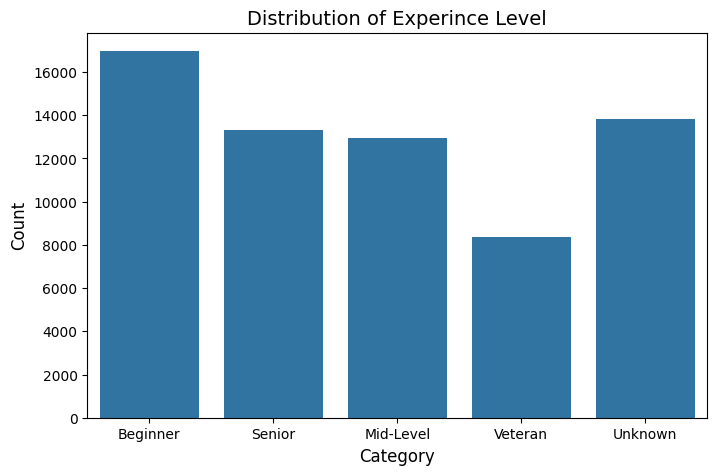

In [26]:
#reordering the bins
df['YearsCodePro_Bins'] = df['YearsCodePro_Bins'].cat.reorder_categories(
    ['Beginner', 'Senior', 'Mid-Level', 'Veteran', 'Unknown'],
    ordered = True
)

#visualizing the counts as a bar chart

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='YearsCodePro_Bins',
    order=df['YearsCodePro_Bins'].cat.categories
)

plt.title('Distribution of Experince Level', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


In [27]:
df['JobSat_labeled'].value_counts()

JobSat_labeled
Unknown    36311
8.0         7509
7.0         6379
6.0         3751
9.0         3626
10.0        2251
5.0         1956
3.0         1165
4.0         1130
2.0          772
0.0          311
1.0          276
Name: count, dtype: int64

In [28]:
df['JobSat'].value_counts()

JobSat
6.940970     17952
6.836292      7590
8.000000      7509
9.000000      6639
7.000000      6379
7.346243      4001
6.000000      3751
10.000000     2251
5.000000      1956
6.494041      1580
3.000000      1165
4.000000      1130
6.691079       971
2.000000       772
7.304348       658
7.035721       546
0.000000       311
1.000000       276
Name: count, dtype: int64

In [29]:
#Finding the median per bin by grouping by the bins column
median_per_bin = (
    df.loc[df['JobSat'].notna()]
      .groupby('YearsCodePro_Bins')['JobSat']
      .median()
)
median_per_bin


/tmp/ipykernel_301/4292586853.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('YearsCodePro_Bins')['JobSat']


YearsCodePro_Bins
Beginner     6.94097
Senior       7.00000
Mid-Level    6.94097
Veteran      7.00000
Unknown      6.94097
Name: JobSat, dtype: float64

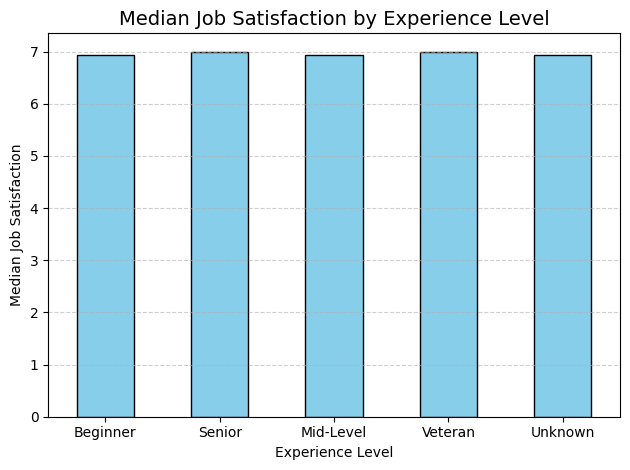

In [30]:
median_per_bin.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Median Job Satisfaction by Experience Level', fontsize=14)
plt.xlabel('Experience Level')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_301/3342561510.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Job Satisfaction')


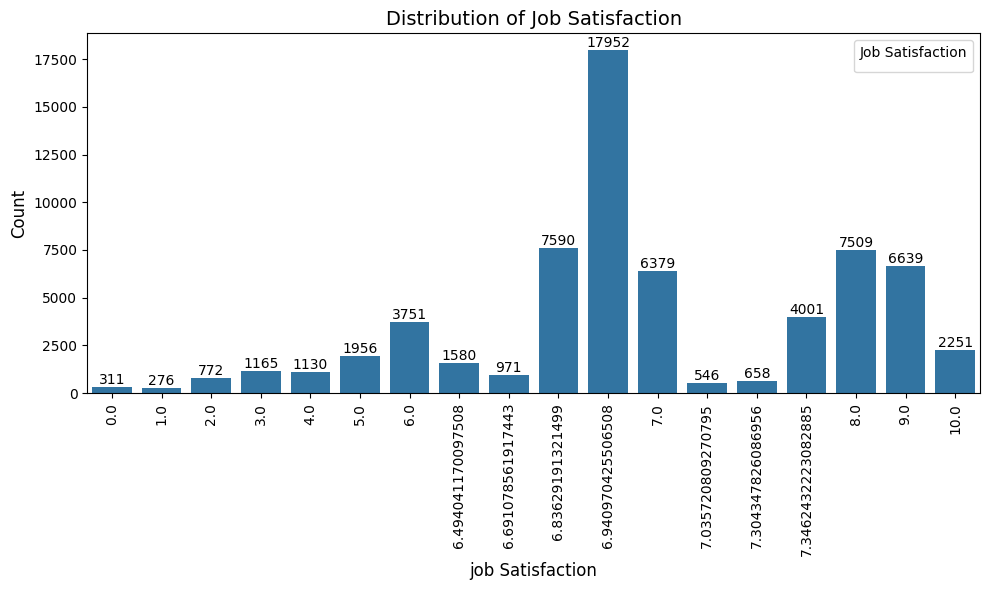

In [32]:
plt.figure(figsize = (10,6))
ax = sns.countplot(
    data = df, 
    x = 'JobSat'
)
#adding titles to my plot, making it more readable
plt.title('Distribution of Job Satisfaction', fontsize=14)
plt.xlabel('job Satisfaction', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Job Satisfaction')
plt.tight_layout()
#adding the exact value count of each category to the plot for readability.
for container in ax.containers:
    ax.bar_label(container)
plt.show()

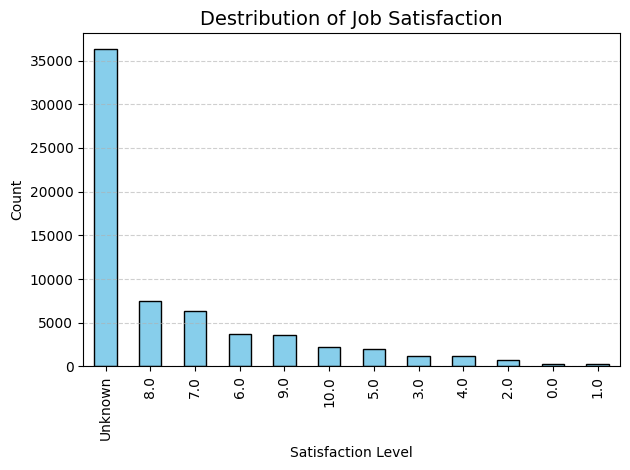

In [85]:
jobsat_count = df['JobSat_labeled'].value_counts()

jobsat_count.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Destribution of Job Satisfaction', fontsize=14)
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_301/2601875268.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Remote Work')


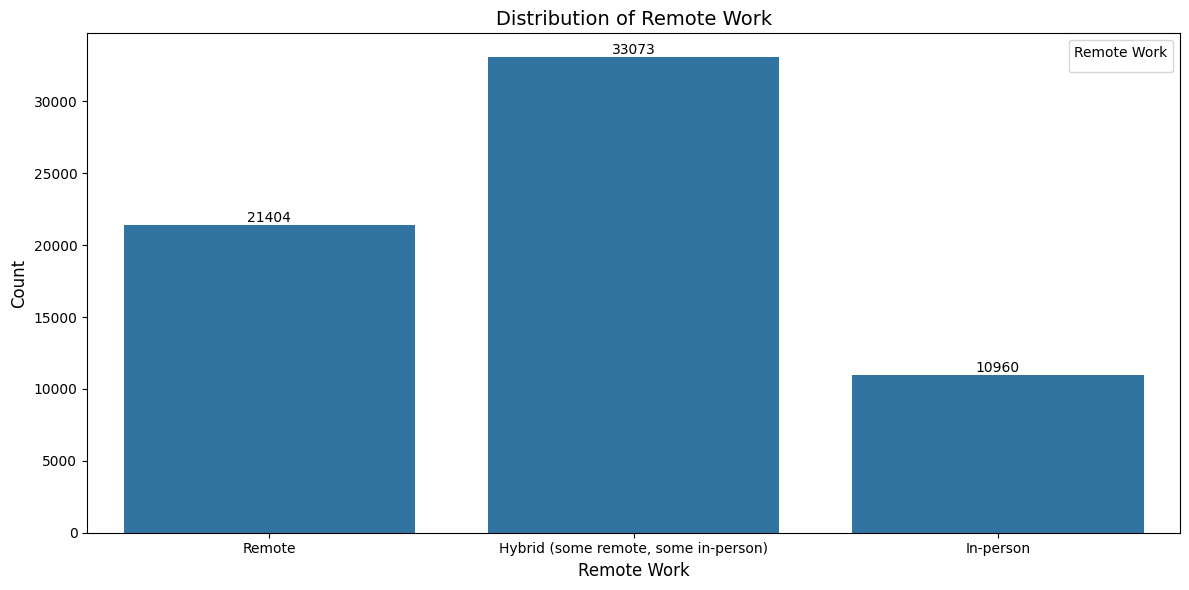

In [33]:
#creating a figure for my seaborn countplot
plt.figure(figsize=(12,6))
ax = sns.countplot(
    data=df,
    x='RemoteWork'
)

plt.title('Distribution of Remote Work', fontsize=14)
plt.xlabel('Remote Work', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Remote Work')
plt.tight_layout()
#adding the exact value count of each category to the plot for readability.
for container in ax.containers:
    ax.bar_label(container)
plt.show()


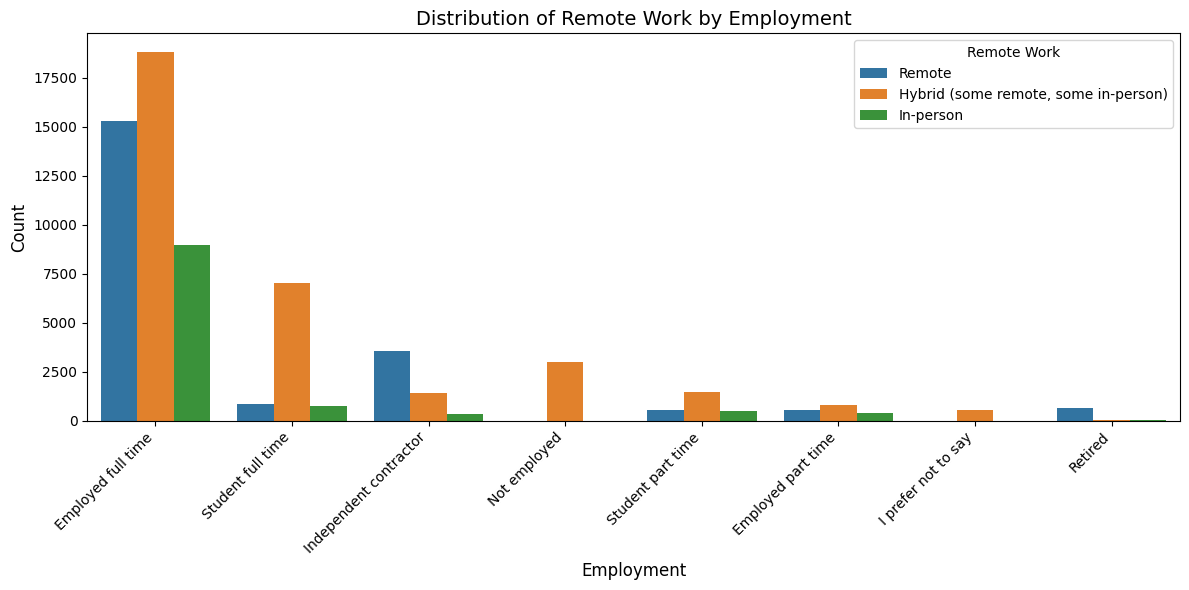

In [35]:
#grouping by each employment type, and seeing the distribution of the remote work types per employment. 

plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='Employment_simplified',
    hue='RemoteWork'
)

plt.title('Distribution of Remote Work by Employment', fontsize=14)
plt.xlabel('Employment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work')
plt.tight_layout()

plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [53]:
# Standardizing the LanguageHaveWorkedWith column before being able to analyze it.
# Spliting the semicolon-separated languages into lists
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].dropna().apply(lambda x: x.split(';'))

# Explode the lists into individual rows. so each respondent has a row for each of the languages he worked with
df_exploded = df.explode('LanguageHaveWorkedWith')

df_exploded.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,JobSat_labeled,Employment_simplified,Employed full time,Employed part time,I prefer not to say,Independent contractor,Not employed,Retired,Student full time,Student part time,YearsCodePro_clean,YearsCodePro_Bins
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.94097,Unknown,Employed full time,True,False,False,False,False,False,False,False,NaN,Unknown
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Bachelor’s degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,UK,NaN,NaN,Bash/Shell (all shells),Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, 

In [56]:
# Group by both Country and LanguageHaveWorkedWith 
lang_by_region = df_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')
lang_by_region

,Country,LanguageHaveWorkedWith,Count
0,Afghanistan,Ada,9
1,Afghanistan,Apex,4
2,Afghanistan,Assembly,7
3,Afghanistan,Bash/Shell (all shells),14
4,Afghanistan,C,13
...,...,...,...
5425,Zimbabwe,Rust,4
5426,Zimbabwe,SQL,15
5427,Zimbabwe,TypeScript,11
5428,Zimbabwe,VBA,2


In [88]:
# Get top 5 languages per country
top_langs_by_country = (
    lang_by_region
    .sort_values(['Country', 'Count'], ascending=[True, False])
    .groupby('Country')
    .head(5)
)
#Now I can search the top 5 languages per country using the loc method, for example Israel
top_langs_by_country.loc[top_langs_by_region['Country']== 'Israel']

,Country,LanguageHaveWorkedWith,Count
2366,Israel,Python,360
2355,Israel,JavaScript,330
2370,Israel,SQL,256
2352,Israel,HTML/CSS,238
2374,Israel,TypeScript,219


In [89]:
sorted_top_langs_by_country = top_langs_by_country.sort_values(['Count'], ascending = False)
pivot_df = sorted_top_langs_by_country.pivot(index='Country', columns='LanguageHaveWorkedWith', values='Count').fillna(0)
pivot_df.head(50)

LanguageHaveWorkedWith,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Crystal,Dart,Delphi,Go,HTML/CSS,Java,JavaScript,Kotlin,MATLAB,MicroPython,PHP,Python,Rust,SQL,Scala,TypeScript,VBA,Visual Basic (.Net),Zig
Country,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,25.0,0.0,0.0,0.0,15.0,25.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,16.0,26.0,0.0,0.0,0.0,16.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,53.0,0.0,0.0,0.0,0.0,37.0,0.0,35.0,0.0,32.0,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,7.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,10.0,0.0,0.0,0.0,0.0,9.0,0.0,8.0,0.0,6.0,0.0,0.0,0.0
Antigua and Barbuda,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189.0,0.0,233.0,0.0,0.0,0.0,0.0,162.0,0.0,192.0,0.0,124.0,0.0,0.0,0.0
Armenia,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,30.0,0.0,0.0,0.0,0.0,23.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,689.0,0.0,793.0,0.0,0.0,0.0,0.0,654.0,0.0,642.0,0.0,549.0,0.0,0.0,0.0


In [91]:
# Keep only top 7 most used languages overall
top_langs = pivot_df.sum().sort_values(ascending=False).head(7).index
pivot_df = pivot_df[top_langs]
pivot_df.head()

LanguageHaveWorkedWith,JavaScript,HTML/CSS,Python,SQL,TypeScript,Bash/Shell (all shells),Java
Country,,,,,,,
Afghanistan,25.0,24.0,25.0,21.0,0.0,0.0,0.0
Albania,26.0,25.0,0.0,28.0,0.0,0.0,16.0
Algeria,53.0,52.0,37.0,35.0,32.0,0.0,0.0
Andorra,7.0,7.0,8.0,8.0,7.0,0.0,0.0
Angola,10.0,8.0,9.0,8.0,6.0,0.0,0.0


In [93]:
top_countries = (
    lang_by_region.groupby('Country')['Count']
    .sum()
    .sort_values(ascending=False)
    .head(30)
    .index
)
pivot_df_top = pivot_df.loc[top_countries]


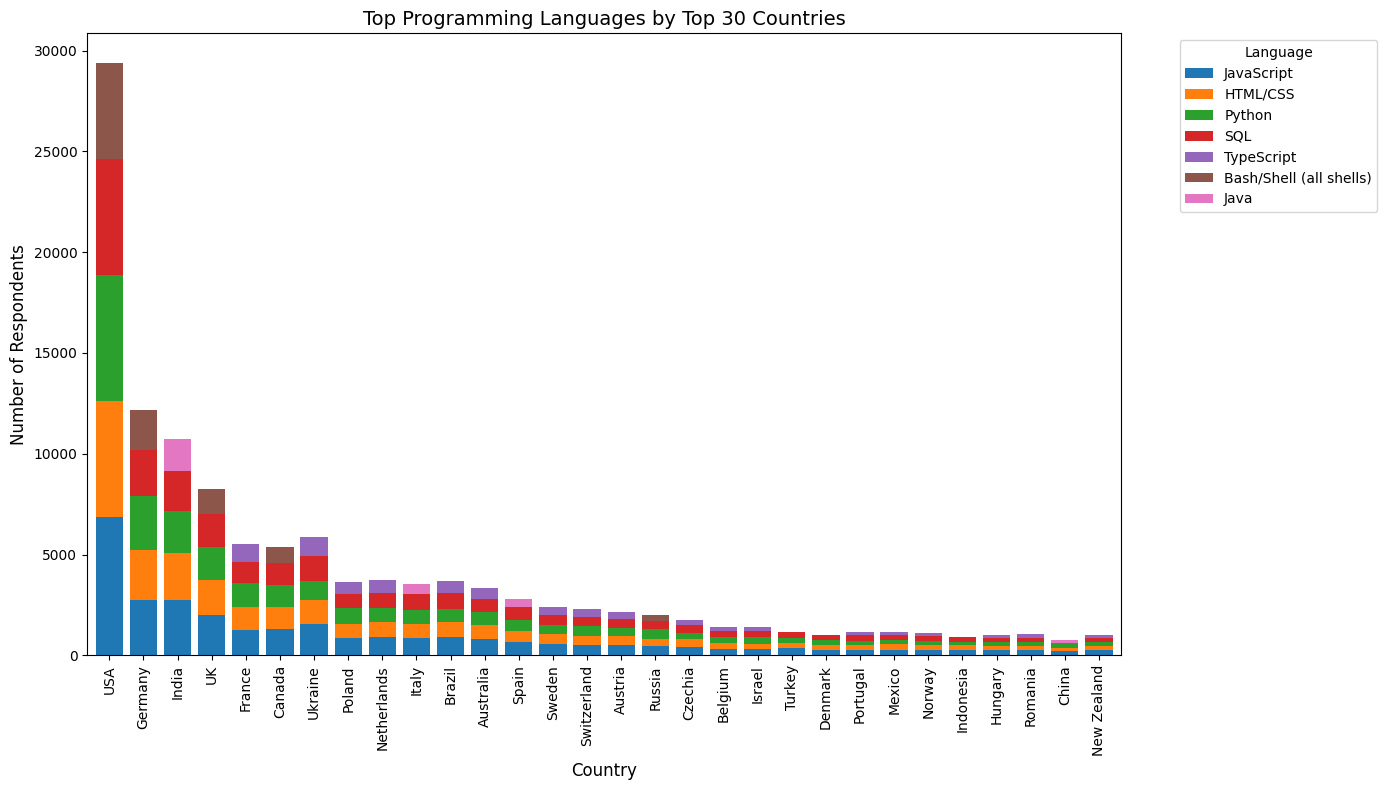

In [94]:
pivot_df_top.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    width=0.8
)

plt.title('Top Programming Languages by Top 30 Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [100]:
## Write your code here
corr = df[['YearsCodePro_clean', 'JobSatPoints_1']].corr()
corr

,YearsCodePro_clean,JobSatPoints_1
YearsCodePro_clean,1.000000,-0.028245
JobSatPoints_1,-0.028245,1.000000


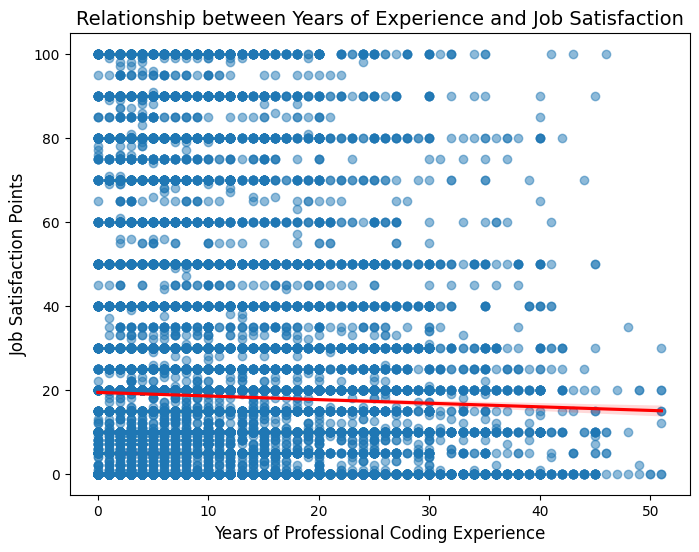

In [102]:
#cerating a scatter plot to visualize the correlation 
plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x='YearsCodePro_clean',
    y='JobSatPoints_1',
    scatter_kws={'alpha':0.5},   # makes points semi-transparent
    line_kws={'color':'red'}     # color of trend line
)

plt.title('Relationship between Years of Experience and Job Satisfaction', fontsize=14)
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Job Satisfaction Points', fontsize=12)
plt.show()

# There seems to not be any correlation between Years of Experience to job satisfaction

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [108]:
## Write your code here
crosstab_df = pd.crosstab(df['EdLevel'], df['Employment_simplified'], normalize='index') * 100


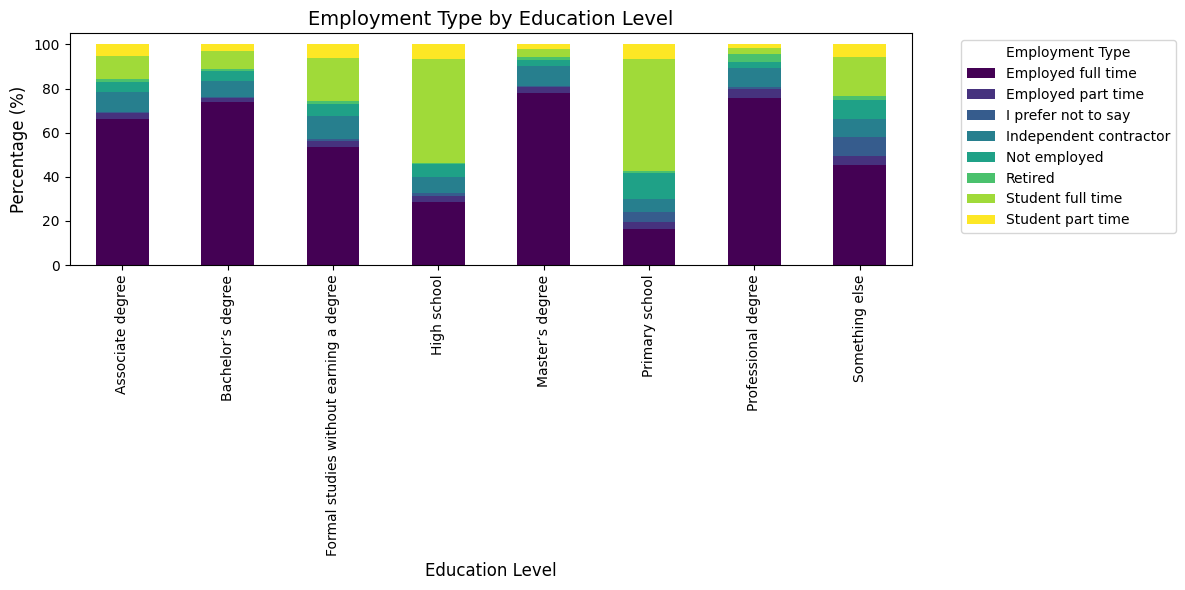

In [109]:
crosstab_df.plot(kind='bar', stacked = True, figsize=(12,6), colormap='viridis')

plt.title('Employment Type by Education Level', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# As a result of cross tabulation and visualizing a stacked bar chart to present the % of each emp type per education level, 
#I can clearly see that the higher education levels such as Bachelor's, Masters, Professional and Associate degrees are employed full time more often than other education levels.
#meaning, Higher education often helps getting a full time job. 

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here
df.to_csv()

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
